In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.vi_config import VietnameseDatasetConfig
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [18]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

In [19]:
n_mfcc = 26
train_file_path, test_file_path, val_file_path = get_n_mfcc_paths(n_mfcc, VietnameseDatasetConfig)
print(train_file_path, test_file_path, val_file_path )
x_traincnn, y_train, x_valcnn, y_val, x_testcnn, y_test, scaler = DataUtils.prepare_data(train_file_path, test_file_path, val_file_path)

D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/train.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/validation.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/test.csv


In [20]:
import joblib
def save_scaler(scaler):
    joblib.dump(scaler, 'scaler.pkl')

save_scaler(scaler)

In [21]:
x_traincnn.shape

(852, 310, 1)

In [22]:
x_testcnn.shape

(213, 310, 1)

In [23]:
cnn_model_statistics = ModelUtilities.load_model(f'cnn_model_using_feature_statistics_with_{n_mfcc}_n_mfcc.keras')

In [24]:
num_layers_to_unfreeze = 5
for layer in cnn_model_statistics.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

In [25]:
cnn_model_statistics.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
cnn_model_statistics.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 310, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 310, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 310, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 155, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 155, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 155, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 155, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 155, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 155, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 78, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 78, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9984)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,556,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,704,583 (10.32 MB)

 Trainable params: 2,703,303 (10.31 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [27]:
model_checkpoint = ModelCheckpoint('fine_tuned_model_using_feature_statistics.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=7, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=4, verbose=1, factor=0.5, min_lr=1e-6)

history = cnn_model_statistics.fit(x_traincnn, y_train, epochs=100, validation_data=(x_valcnn, y_val), batch_size=32, callbacks=[model_checkpoint, early_stop, lr_reduction])

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4277 - loss: 2.2695 - val_accuracy: 0.5140 - val_loss: 1.6204 - learning_rate: 2.0000e-04
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7896 - loss: 0.7064 - val_accuracy: 0.6313 - val_loss: 1.2941 - learning_rate: 2.0000e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8742 - loss: 0.3556 - val_accuracy: 0.6536 - val_loss: 1.2387 - learning_rate: 2.0000e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9309 - loss: 0.2376 - val_accuracy: 0.6704 - val_loss: 1.2439 - learning_rate: 2.0000e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9593 - loss: 0.1940 - val_accuracy: 0.6983 - val_loss: 1.2038 - learning_rate: 2.0000e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9434 - loss: 0.1872 - val_accuracy: 0.7151 - val_loss: 1.2237 - learning_rate: 2.0000e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 

In [28]:
loss, accuracy = cnn_model_statistics.evaluate(x_testcnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6973 - loss: 1.0298 
Test Loss: 1.0831623077392578, Test Accuracy: 0.6995305418968201


In [29]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.501173734664917, 0.8110328912734985, 0.8826290965080261, 0.9330986142158508, 0.9507042169570923, 0.9612675905227661, 0.9730046987533569, 0.9800469279289246, 0.9788732528686523, 0.9788732528686523, 0.9812206625938416, 0.9788732528686523, 0.9812206625938416, 0.98591548204422, 0.9823943376541138, 0.9800469279289246], 'loss': [1.8104139566421509, 0.6051695942878723, 0.3590133786201477, 0.23413771390914917, 0.20080441236495972, 0.16341997683048248, 0.1093691736459732, 0.0975613221526146, 0.08539905399084091, 0.07901004701852798, 0.07549028098583221, 0.0806649774312973, 0.0767912045121193, 0.05182962119579315, 0.0643039122223854, 0.07113739103078842], 'val_accuracy': [0.5139665007591248, 0.6312848925590515, 0.6536312699317932, 0.6703910827636719, 0.6983240246772766, 0.7150837779045105, 0.7039105892181396, 0.6983240246772766, 0.7150837779045105, 0.7039105892181396, 0.7094972133636475, 0.7150837779045105, 0.7094972133636475, 0.7094972133636475, 0.7150837779045105, 0.71508377790

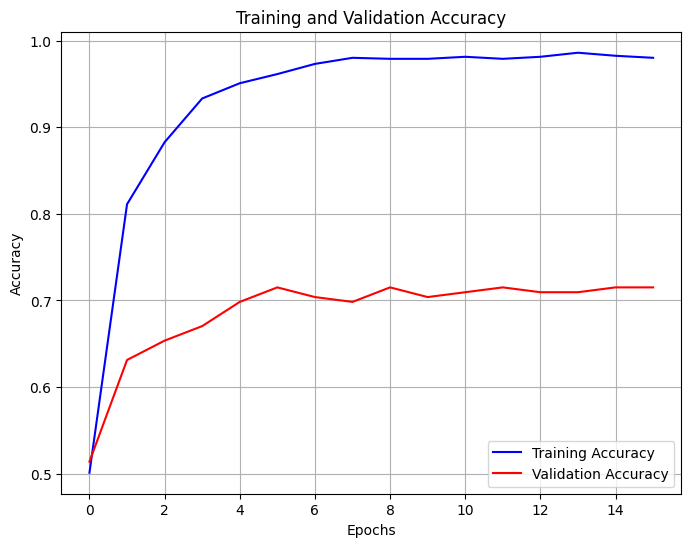

In [30]:
ModelUtilities.plot_training_history(history_dict)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


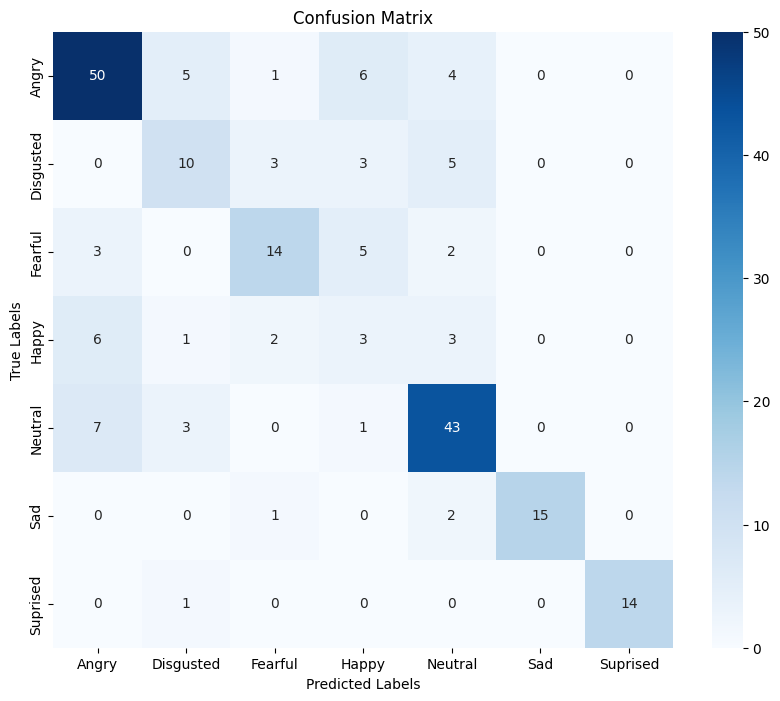

In [31]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


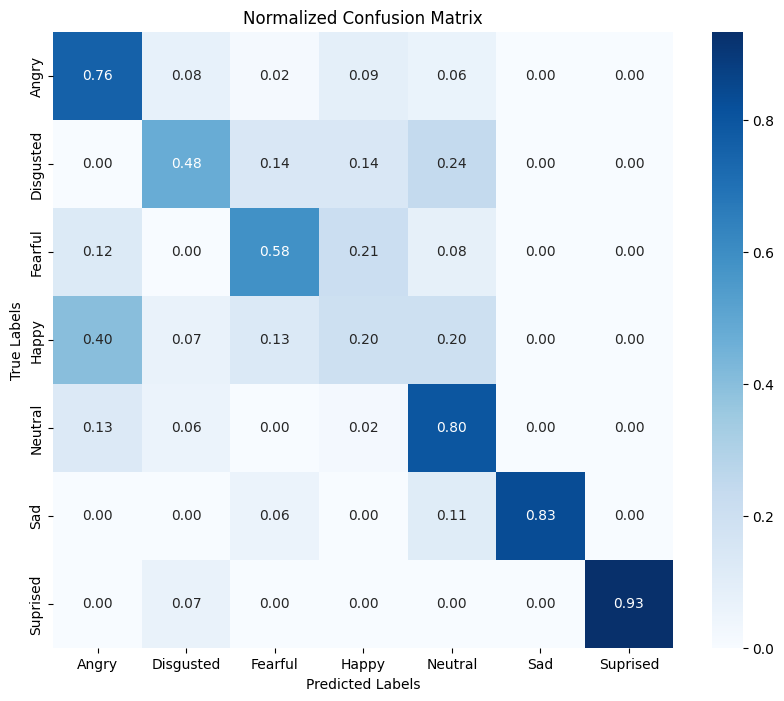

In [32]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])